# 决策树处理分类任务

1.	使用sklearn.tree.DecisionTreeClassifier完成Breast_Cancer_Wisconsin数据集预测问题
2.	计算最大深度为10时，十折交叉验证的精度(accuracy)，查准率(precision)，查全率(recall)，F1值
3.	绘制最大深度从1到10的决策树十折交叉验证精度的变化图

## 1. 读取数据

In [11]:
import numpy as np
import pandas as pd
data = pd.read_csv('data/Breast_Cancer_Wisconsin/data')
print(data.shape)

(569, 33)


In [12]:
data = data.values 
data_x = data[:,2:-1]
data_y = data[:,1:2]
data_y = np.reshape(data_y,(-1))
data_y = np.where(data_y == 'M', 1, 0)

print(data_x.shape)
print(data_y.shape)

(569, 30)
(569,)


## 2. 导入模型

In [13]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier

## 3. 训练与预测
计算最大深度为10的决策树，在使用数据data_x，标记data_y下，十折交叉验证的精度，查准率，查全率和F1值

In [15]:
model = DecisionTreeClassifier(max_depth = 10) # 参数max_depth决定了决策树的最大深度
# YOUR CODE HERE
y_pred = cross_val_predict(model, data_x, data_y, cv=10) # 十折交叉验证

accuracy = accuracy_score(data_y, y_pred)
precision = precision_score(data_y, y_pred)
recall = recall_score(data_y, y_pred)
f1 = f1_score(data_y, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9279437609841827
Precision: 0.9014084507042254
Recall: 0.9056603773584906
F1 Score: 0.9035294117647059


###### 双击此处填写下面的表格

最大深度为10：  

精度 | 查准率 | 查全率 | F1
-|-|-|-
0.9279437609841827 | 0.9014084507042254 | 0.9056603773584906 | 0.9035294117647059

## 4. 改变最大深度，绘制决策树的精度变换图

绘制最大深度从1到10，决策树十折交叉验证精度的变化图

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
y = []
# YOUR CODE HERE
for i in range(10):
    model = DecisionTreeClassifier(max_depth = i+1)                      # YOUR CODE
    prediction = cross_val_predict(model, data_x, data_y, cv=10)                 # YOUR CODE
    acc_score = accuracy_score(data_y, prediction)
    y.append(acc_score)

x = np.linspace(1,10,10)
test = y                           # YOUR CODE


Text(0, 0.5, 'accuracy_score')

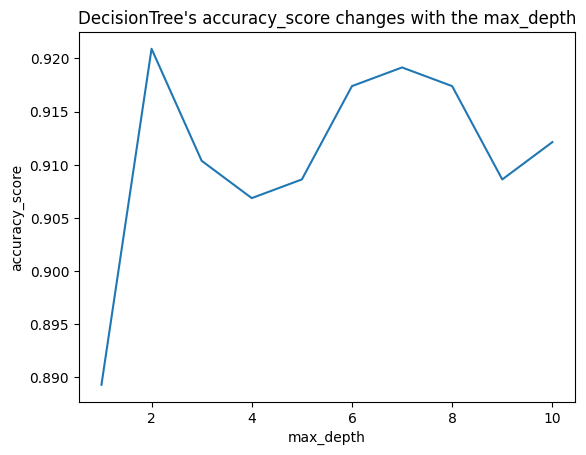

In [20]:
plt.figure()
plt.plot(x,test,'-')
plt.title("DecisionTree's accuracy_score changes with the max_depth")
plt.xlabel("max_depth")    
plt.ylabel("accuracy_score")

# 5. （选做）通过调整参数，得到一个泛化能力最好的模型

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
modelfit = DecisionTreeClassifier(max_depth = 10)
param_grid = {'criterion':['gini','entropy'],'max_depth':[10,11,12],
                  'min_samples_leaf':[1,2,3,4,5],'max_features':[1,2,3,4,5],'min_samples_split':[2,3,4,5]}

# YOUR CODE HERE
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
grid = GridSearchCV(modelfit, param_grid, scoring='accuracy', cv=cv, n_jobs=-1)
grid.fit(data_x, data_y)

# 输出最优参数和相应的精度指标
print("Best Parameters: ", grid.best_params_)
print("Accuracy: ", grid.best_score_)
print("Precision: ", precision_score(data_y, grid.predict(data_x)))
print("Recall: ", recall_score(data_y, grid.predict(data_x)))
print("F1 Score: ", f1_score(data_y, grid.predict(data_x)))

Best Parameters:  {'criterion': 'gini', 'max_depth': 11, 'max_features': 5, 'min_samples_leaf': 2, 'min_samples_split': 5}
Accuracy:  0.9526002506265666
Precision:  0.9950980392156863
Recall:  0.9575471698113207
F1 Score:  0.9759615384615384
